所有列名:
['Time', 'hour', 'Energy_safe', 'P', 'Mainland_cost_safe', 'Unnamed: 5', 'TPAT', 'Price estimated', 'Real-Price', 'Unnamed: 9', 'Load shift potential ']

数据形状: (3517, 11)

前5行数据:
            Time  hour  Energy_safe   P  Mainland_cost_safe  Unnamed: 5  \
0  2025/1/2 0:00   1.0   263.991791  P6            0.974045         NaN   
1  2025/1/2 0:15   1.0   266.814301  P6            1.289809         NaN   
2  2025/1/2 0:30   1.0   267.077820  P6            1.388841         NaN   
3  2025/1/2 0:45   1.0   250.285843  P6            1.448251         NaN   
4  2025/1/2 1:00   2.0   240.673401  P6            1.547240         NaN   

       TPAT  Price estimated  Real-Price  Unnamed: 9  Load shift potential   
0  0.000018       110.463385  179.842144         NaN              69.378759  
1  0.000018       144.725867  179.842144         NaN              35.116277  
2  0.000018       155.684213  179.842144         NaN              24.157931  
3  0.000018       173.235635  179.842144         NaN

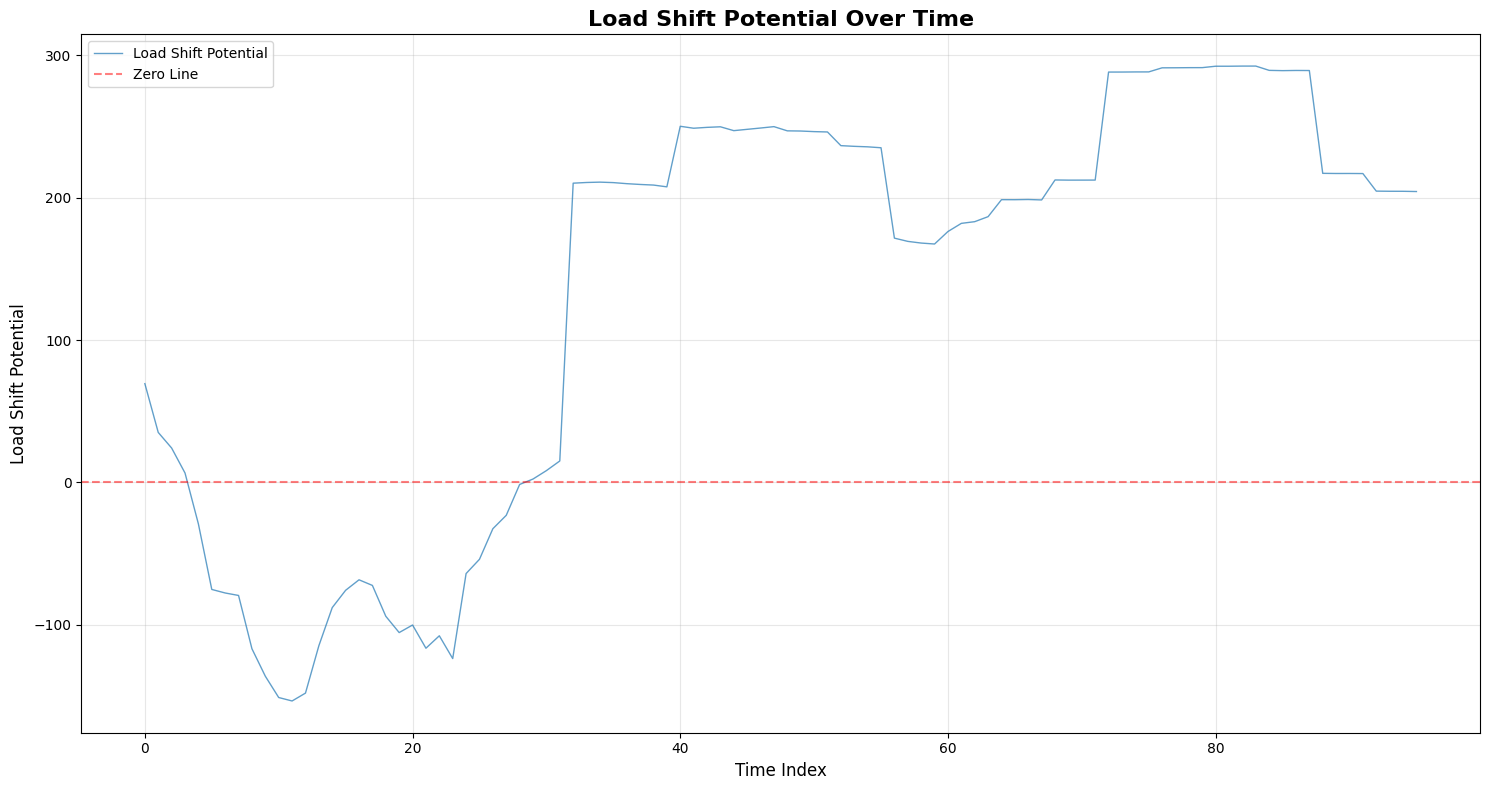

<Figure size 1500x1000 with 0 Axes>

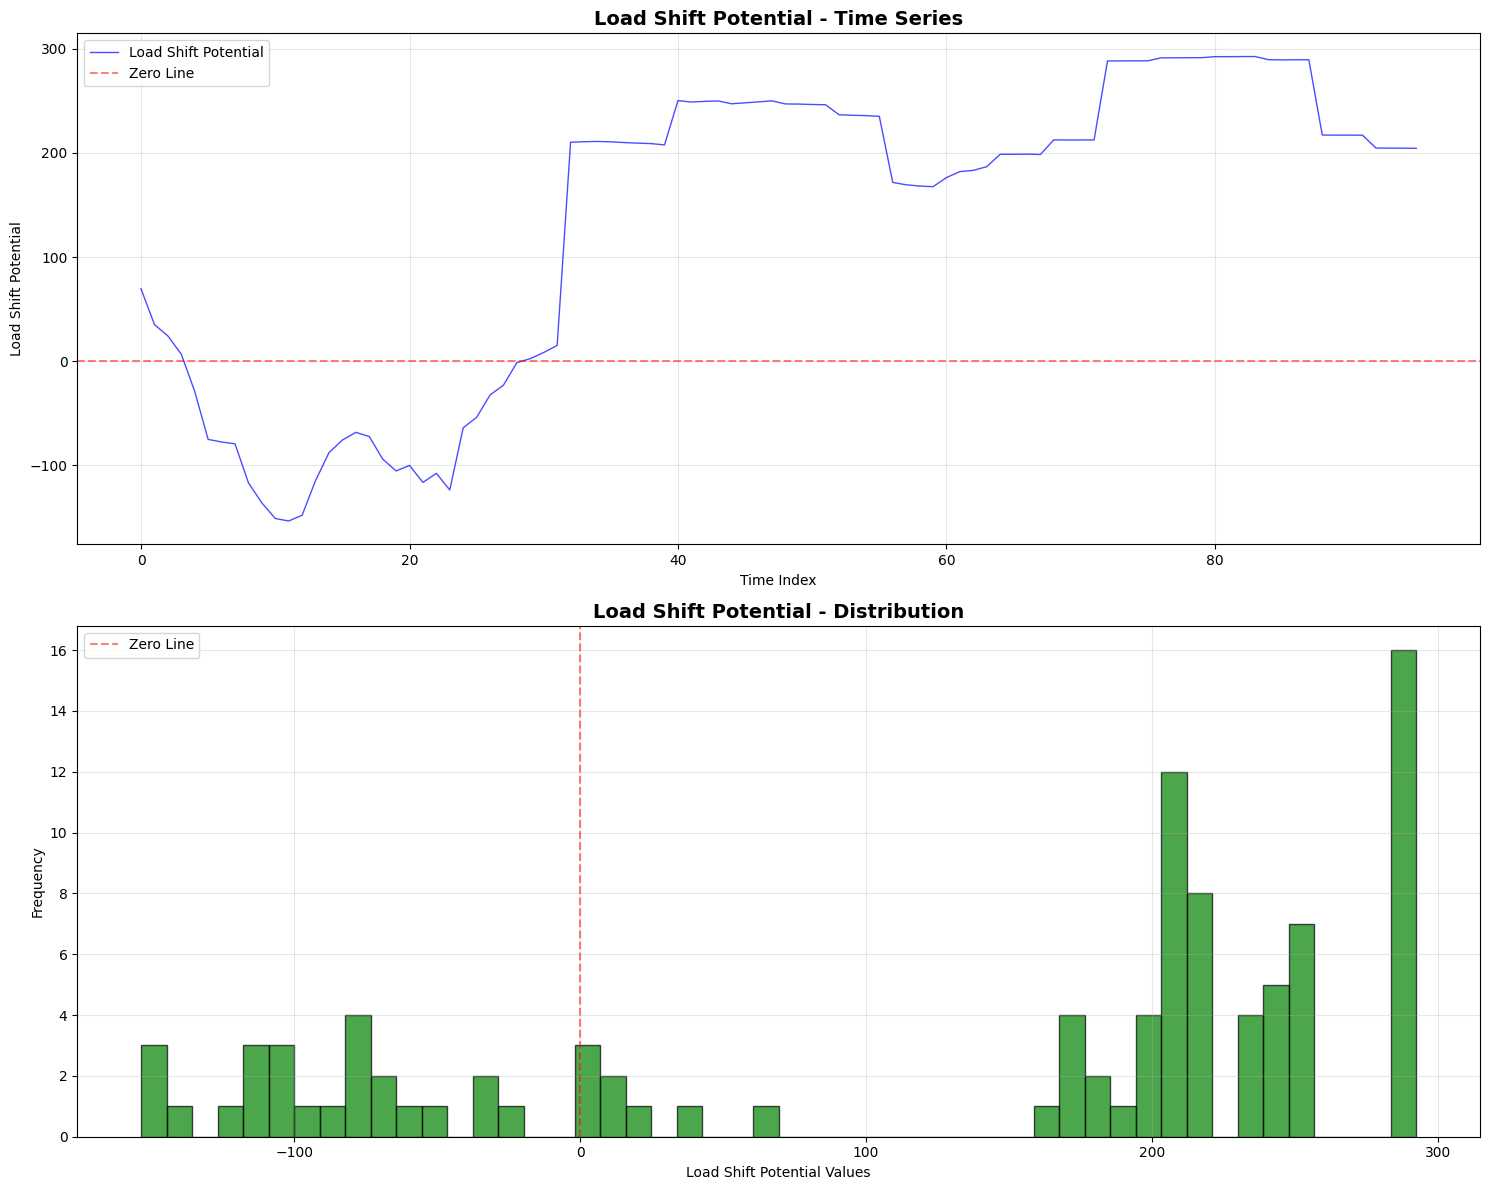


=== Load shift potential  统计信息 ===
数据点数: 96
平均值: 134.74
标准差: 148.83
最小值: -153.57
最大值: 292.52
正值比例: 74.0%
负值比例: 26.0%


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# 读取CSV文件
df = pd.read_csv('Forecast_Safe.csv')

# 首先检查实际的列名
print("所有列名:")
print(df.columns.tolist())
print("\n数据形状:", df.shape)

# 查看前几行数据，了解列名的确切格式
print("\n前5行数据:")
print(df.head())

# 查看列名的详细信息
print("\n列信息:")
for i, col in enumerate(df.columns):
    print(f"{i}: '{col}'")

# 根据实际列名调整 - 从输出看，列名可能有空格问题
# 尝试不同的列名可能性
potential_column_names = [
    'Load shift potential',
    'Load shift potential ',
    'Load_shift_potential',
    'Loadshift potential',
    'Load shift potential\u200b'  # 可能包含不可见字符
]

# 找到正确的列名
load_shift_col = None
for col_name in potential_column_names:
    if col_name in df.columns:
        load_shift_col = col_name
        break

# 如果上述方法没找到，尝试通过位置索引
if load_shift_col is None:
    print("\n通过预定义列名未找到，尝试通过位置查找...")
    # 查看最后一列的名称（从数据看可能是最后一列）
    last_col = df.columns[-1]
    print(f"最后一列名称: '{last_col}'")
    load_shift_col = last_col

print(f"\n使用的列名: '{load_shift_col}'")

# 检查该列的数据
print(f"\n{load_shift_col}列的基本统计:")
print(df[load_shift_col].describe())

# 检查是否有空值
print(f"\n空值数量: {df[load_shift_col].isna().sum()}")

# 创建图表
plt.figure(figsize=(15, 8))

# 绘制Load Shift Potential
plt.plot(df.index, df[load_shift_col],
         linewidth=1, alpha=0.7, label='Load Shift Potential')

# 添加零线参考
plt.axhline(y=0, color='red', linestyle='--', alpha=0.5, label='Zero Line')

# 设置图表标题和标签
plt.title('Load Shift Potential Over Time', fontsize=16, fontweight='bold')
plt.xlabel('Time Index', fontsize=12)
plt.ylabel('Load Shift Potential', fontsize=12)

# 添加网格
plt.grid(True, alpha=0.3)

# 添加图例
plt.legend()

# 优化布局
plt.tight_layout()

# 显示图表
plt.show()

# 创建更详细的图表
plt.figure(figsize=(15, 10))

# 创建子图布局
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(15, 12))

# 子图1：时间序列
ax1.plot(df.index, df[load_shift_col],
         linewidth=1, alpha=0.7, color='blue', label='Load Shift Potential')
ax1.axhline(y=0, color='red', linestyle='--', alpha=0.5, label='Zero Line')
ax1.set_title('Load Shift Potential - Time Series', fontsize=14, fontweight='bold')
ax1.set_xlabel('Time Index')
ax1.set_ylabel('Load Shift Potential')
ax1.grid(True, alpha=0.3)
ax1.legend()

# 子图2：直方图
ax2.hist(df[load_shift_col].dropna(), bins=50, alpha=0.7, color='green', edgecolor='black')
ax2.axvline(x=0, color='red', linestyle='--', alpha=0.5, label='Zero Line')
ax2.set_title('Load Shift Potential - Distribution', fontsize=14, fontweight='bold')
ax2.set_xlabel('Load Shift Potential Values')
ax2.set_ylabel('Frequency')
ax2.grid(True, alpha=0.3)
ax2.legend()

plt.tight_layout()
plt.show()

# 打印统计信息
print(f"\n=== {load_shift_col} 统计信息 ===")
clean_data = df[load_shift_col].dropna()
print(f"数据点数: {len(clean_data)}")
print(f"平均值: {clean_data.mean():.2f}")
print(f"标准差: {clean_data.std():.2f}")
print(f"最小值: {clean_data.min():.2f}")
print(f"最大值: {clean_data.max():.2f}")
print(f"正值比例: {(clean_data > 0).sum() / len(clean_data) * 100:.1f}%")
print(f"负值比例: {(clean_data < 0).sum() / len(clean_data) * 100:.1f}%")
